In [92]:
# RECOPILACION DE DATOS 

# Lectura de las instancias de CVRPLIB

#A-n32-k5

# PRIMERO DEBEMOS LEER DEL ARCHIVO 

import numpy as np 
import pandas as pd 

# Nombre de la instancia 
fname = 'Augerat/A-n80-k10.vrp'

#DONDE

# A : AUTOR DE LA INSTANCIA 
# N : NÚMERO DE NODOS O CIUDADES A VISITAR
# K : NÚMERO DE VEHICULOS DISPONIBLES

# CREAMOS UNA VARIABLE LINEAS COMO LISTA PARA ALMACENAR LA DATA DE LA INSTANCIA

lineas = []

# ABRIMOS LA INSTANCIA Y RECOPILAMOS LA DATA COMO LISTA

with open (fname , 'rt') as f:
    for f_lineas in f:
        lineas.append(f_lineas)

# OBTENIENDO CAPACIDAD DE LOS VEHICULOS,CANTIDAD DE NODOS,CANTIDAD DE VEHICULOS COMO STRING

dimension_str = lineas[3]
capacidad_str = lineas[5]
vehiculos_str = lineas[0]

# CAMBIANDO EL TIPO DE STRING A INTEGER

instancia = lineas[0]

capacidad = int((capacidad_str[10:]))

nodos = int(dimension_str[12:])

vehiculos = int(vehiculos_str[14:])

clientes = nodos - 1

print(instancia)
print("La cantidad de vehiculos son de:" , vehiculos)
print("\n")
print("La capacidad de los vehiculos es de : " ,capacidad)
print("\n")
print ("La cantidad de nodos que tiene la instancia es: " , nodos)
print("\n")


extraer_coordenadas = nodos + 7


# OBTENGO LOS DATOS DE LAS COORDENADAS DE LOS NODOS EN UN ARREGLO 


data_coordenadas = lineas[7 : extraer_coordenadas]


# AHORA HAY QUE OBTENER LAS DEMANDAS DE CADA CIUDAD 

extraer_demandas = extraer_coordenadas + 1

data_demandas = lineas[extraer_demandas : extraer_demandas + nodos ]


# SEPARAR LOS DATOS DE EL ARREGLO DE COORDENADAS 

limpieza_coordenadas = []
limpieza_demandas = []


for x in data_coordenadas:
    limpieza_coordenadas.append(x.split())
    
for y in data_demandas:
    limpieza_demandas.append(y.split())
    


#CREACION DEL DATAFRAME Y ALMACENANDO LA DATA DE LIMPIEZA_COORDENADAS

print("Creacion del DATAFRAME de los nodos con sus demandas respectivas")
print("\n")


df = pd.DataFrame({
        "x" : [int(limpieza_coordenadas[x][1]) for x in range(0,nodos)],
        "y" : [int(limpieza_coordenadas[x][2]) for x in range(0,nodos)],
        "demanda" : [int(limpieza_demandas[x][1]) for x in range(0,nodos)]
})
    

print(df)    
print("\n")
    
    
# Generando los arcos o los caminos que se pueden recorrer 

print("DATAFRAME de los nodos con su distancia euclidiana")
print("\n")
df_distancias = pd.DataFrame({
    
        "nodos" : [(i,j) for i in range(0,nodos) for j in range(0,nodos) if i < j], # ANTES i != j 1
        "distancia" : [np.hypot(int(limpieza_coordenadas[i][1]) - int(limpieza_coordenadas[j][1]) ,  int(limpieza_coordenadas[i][2]) -  int(limpieza_coordenadas[i][2]) ) for i in range(0, nodos) for j in range(0,nodos) if i < j] # i != j 
      
})

print(df_distancias)
print("\n")


NAME : A-n80-k10

La cantidad de vehiculos son de: 10


La capacidad de los vehiculos es de :  100


La cantidad de nodos que tiene la instancia es:  80


Creacion del DATAFRAME de los nodos con sus demandas respectivas


      x   y  demanda
0    92  92        0
1    88  58       24
2    70   6       22
3    57  59       23
4     0  98        5
5    61  38       11
6    65  22       23
7    91  52       26
8    59   2        9
9     3  54       23
10   95  38        9
11   80  28       14
12   66  42       16
13   79  74       12
14   99  25        2
15   20  43        2
16   40   3        6
17   50  42       20
18   97   0       26
19   21  19       12
20   36  21       15
21  100  61       13
22   11  85       26
23   69  35       17
24   69  22        7
25   29  35       12
26   14   9        4
27   50  33        4
28   89  17       20
29   57  44       10
..  ...  ..      ...
50   23  85       10
51   63  69        3
52   87  19        6
53   56  75       13
54   15  63        2
5

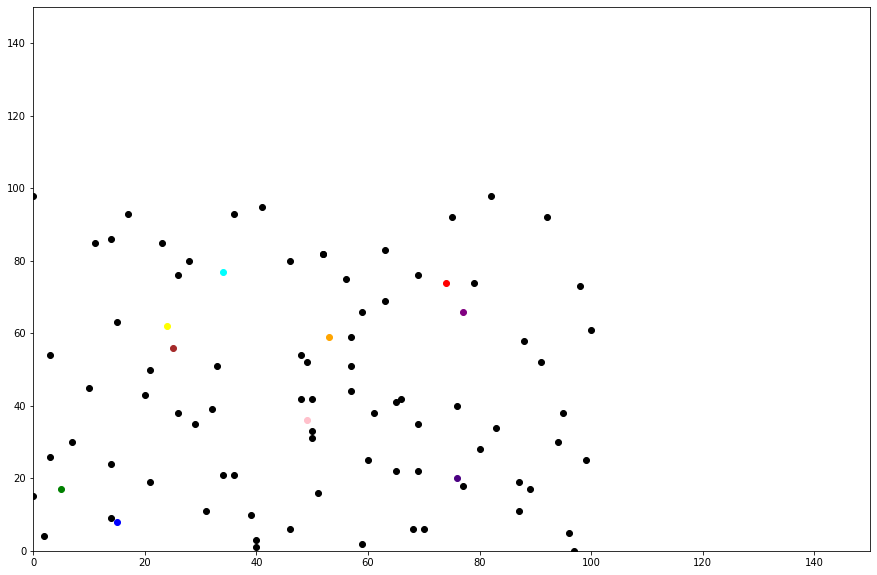

{1: [74, 74],
 2: [15, 8],
 3: [5, 17],
 4: [77, 66],
 5: [25, 56],
 6: [49, 36],
 7: [76, 20],
 8: [24, 62],
 9: [34, 77],
 10: [53, 59]}

In [115]:
# CLUSTERING DE LA DATA 

import matplotlib.pyplot as plt
%matplotlib inline


k = vehiculos

centroide = {
    
    i+1: [np.random.randint(0,nodos) , np.random.randint(0,nodos)]
    for i in range(k)
    
}

fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'] , df['y'] , color='k')
colmap = {1 : 'red' , 2 : 'blue' , 3: 'green' , 4 : 'purple' , 5 : 'brown' , 6 : 'pink' , 7 : 'indigo' , 8 : 'yellow' , 9 : 'cyan' , 10 : 'orange' }

for i in centroide.keys():
    plt.scatter(*centroide[i] , color=colmap[i])
    
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()


centroide

    
    


      x   y  demanda  distancia_desde_1  distancia_desde_2  distancia_desde_3  \
0    92  92        0          25.455844         113.951744         114.865138   
1    88  58       24          21.260292          88.481637          92.574294   
2    70   6       22          68.117545          55.036352          65.924199   
3    57  59       23          22.671568          66.068147          66.843100   
4     0  98        5          77.794601          91.241438          81.154174   
5    61  38       11          38.275318          54.918121          59.808026   
6    65  22       23          52.773099          51.923020          60.207973   
7    91  52       26          27.802878          87.817994          92.849340   
8    59   2        9          73.545904          44.407207          56.044625   
9     3  54       23          73.763134          47.539457          37.054015   
10   95  38        9          41.677332          85.440037          92.417531   
11   80  28       14        

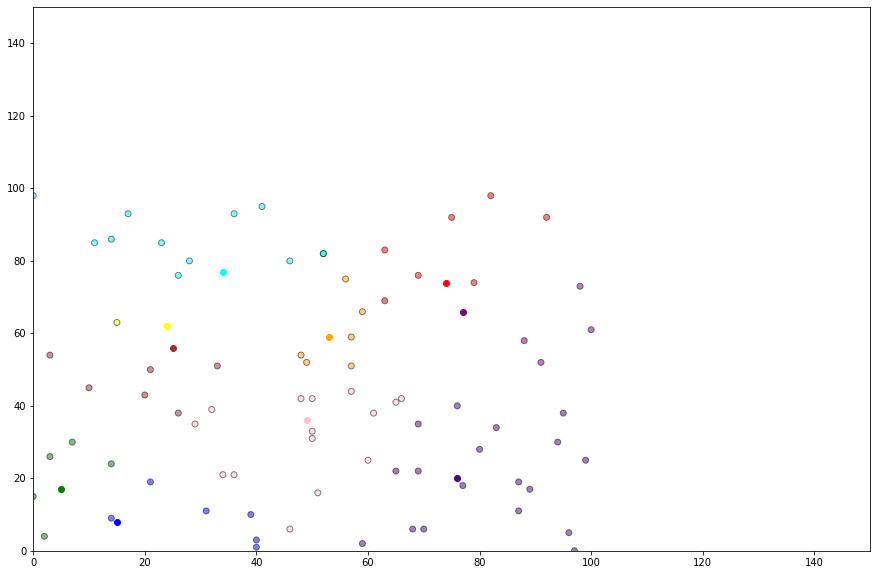

In [116]:
def asignar_centroide(df , centroide):
    for i in centroide.keys():
        df['distancia_desde_{}'.format(i)] = (
            
           # np.hypot(df['x'] - centroide[i][0] , df['y'] - centroide[i][1])
            np.sqrt( (df['x'] - centroide[i][0])**2 + (df['y'] - centroide[i][1])**2 )
        )
                
    distancia_centroide = ['distancia_desde_{}'.format(i) for i in centroide.keys()]
    df['cercania'] = df.loc[: , distancia_centroide].idxmin(axis=1)
    df['cercania'] = df['cercania'].map(lambda x : int(x.lstrip('distancia_desde_')))
    df['color'] = df['cercania'].map(lambda x : colmap[x])    
    return df


df = asignar_centroide(df , centroide)
print(df)
print("\n")
print("\n")



print("AHORA GRAFICANDO LOS PUNTOS RELACIONADOS (CERCANIA) CON EL CENTROIDE ACTUAL")
fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])
    
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()


        

GRAFICO DE LOS ANTIGUOS CENTROIDES PARA VER COMO CAMBIAN SU POSICION.


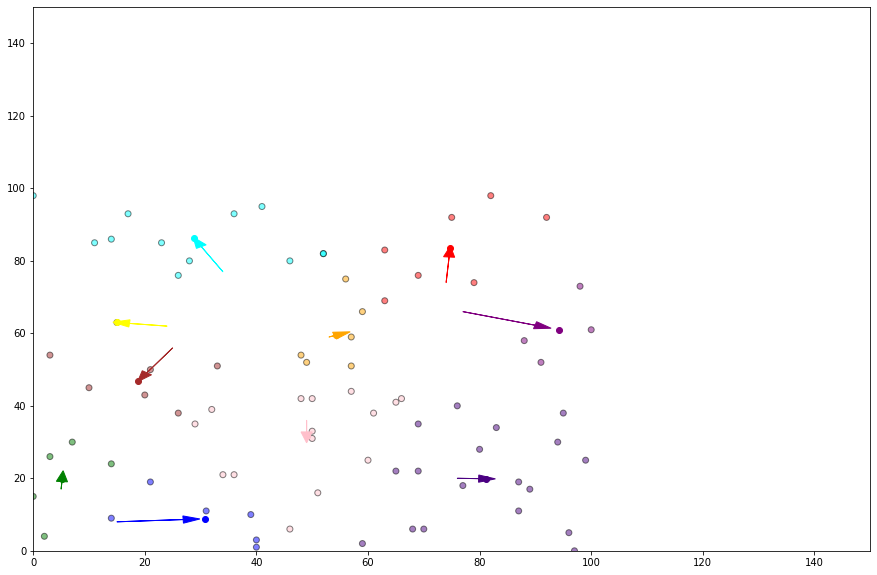

In [117]:
# CAMBIANDO EL CENTROIDE 

import copy

centroide_anterior = copy.deepcopy(centroide)

def update(k):
    for i in centroide.keys():
        centroide[i][0]  = np.mean(df[df['cercania'] == i]['x'])
        centroide[i][1]  = np.mean(df[df['cercania'] == i]['y'])

    return k 
    
centroide = update(centroide)

fig = plt.figure(figsize=(15,10))
ax = plt.axes()
plt.scatter(df['x'] , df['y'] , color=df['color'] , alpha=0.5 , edgecolor='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] ,color = colmap[i])
plt.xlim(0,150)
plt.ylim(0,150)

for i in centroide.keys():
    old_x = centroide_anterior[i][0]
    old_y = centroide_anterior[i][1]
    dx = (centroide[i][0] - centroide_anterior[i][0]) * 0.75
    dy = (centroide[i][1] - centroide_anterior[i][1]) * 0.75
    ax.arrow(old_x , old_y , dx , dy , head_width = 2 , head_length=3 , fc=colmap[i], ec=colmap[i])
    
print("GRAFICO DE LOS ANTIGUOS CENTROIDES PARA VER COMO CAMBIAN SU POSICION.")
plt.show()






GRAFICO DE LA NUEVA SELECCION DE CENTROIDE.


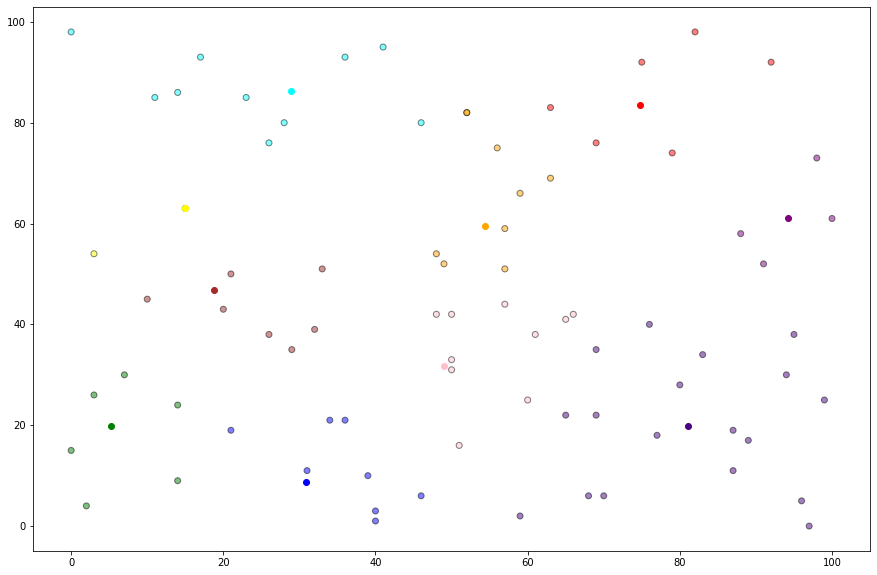

In [118]:
# REPETIR SELECCION DE CENTROIDE

df = asignar_centroide(df , centroide)


#RESULTADO DE LA NUEVA ELECCION 

print("GRAFICO DE LA NUEVA SELECCION DE CENTROIDE.")

fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])


EL GRAFICO FINAL LUEGO DE MULTIPLES ITERACCIONES


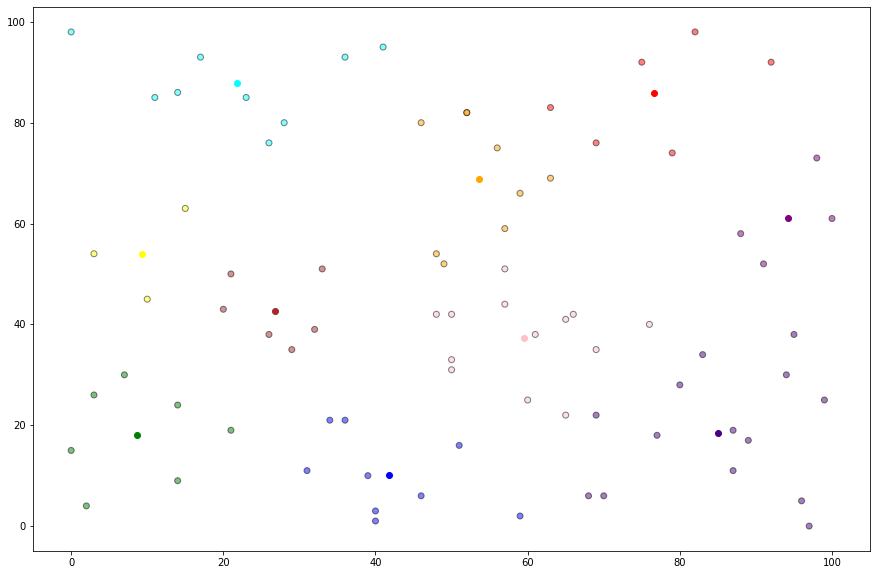

In [119]:
#CONTINUA MIENTRAS TODAS LAS ASIGNACIONES NO CAMBIEN MÁS

while True:
    centroide_cercano = df['cercania'].copy(deep=True)
    centroide = update(centroide)
    df = asignar_centroide(df , centroide)
    if centroide_cercano.equals(df['cercania']):
        break

print("EL GRAFICO FINAL LUEGO DE MULTIPLES ITERACCIONES")
        
fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'],df['y'],color = df['color'] , alpha=0.5 ,  edgecolor ='k')
for i in centroide.keys():
    plt.scatter(*centroide[i] , color = colmap[i])   


In [128]:
#MOSTAR LOS CLUSTERS A TRABAJAR 


#colmap = colmap = {1 : 'red' , 2 : 'blue' , 3: 'green' , 4 : 'purple' , 5 : 'brown' , 6 : 'pink' , 7 : 'gray' , 8 : 'olive' , 9 : 'cyan' , 10 : 'orange'}


cluster_rojo = df[df['color'] == "red"]

cluster_azul = df[df['color'] == "blue"]

cluster_verde = df[df['color'] == "green"]

cluster_morado = df[df['color'] == "purple"]

cluster_cafe = df[df['color'] == "brown"]

cluster_rosado = df[df['color'] == "pink"]

cluster_indigo = df[df['color'] == "indigo"]

cluster_amarillo = df[df['color'] == "yellow"]

cluster_celeste = df[df['color'] == "cyan"]

cluster_naranja = df[df['color'] == "orange"]

print("N°1: Agrupacion de rojos")

cluster_rojo



N°1: Agrupacion de rojos


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
0,92,92,0,16.526914,96.062801,111.316610,31.081546,81.734156,63.534178,73.825843,90.982294,70.342460,44.913772,1,red
13,79,74,12,12.061187,73.941084,89.778071,20.039024,60.853421,41.466105,55.831105,72.480649,58.883648,25.974822,1,red
36,63,83,12,13.957276,75.915564,84.577702,38.217306,54.173846,45.746536,68.171827,61.000911,41.511117,17.072467,1,red
42,69,76,23,12.468850,71.290919,83.557264,29.369414,53.750711,39.757624,59.703776,63.593326,48.695831,17.049673,1,red
49,82,98,13,13.284285,96.655491,108.388003,38.975152,78.135388,64.643217,79.559309,84.949658,61.065134,40.780200,1,red
73,75,92,12,6.387923,88.371410,99.240483,36.490581,68.947847,56.761778,74.186816,75.869039,53.380766,31.609109,1,red


In [129]:
print("N°2: Agrupacion de azules")

cluster_azul

N°2: Agrupacion de azules


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
8,59,2,9,85.674611,19.036677,52.813302,68.728178,51.850479,35.388712,30.854001,71.908120,93.607666,66.999355,2,blue
16,40,3,6,90.585902,7.329966,34.757762,79.417016,41.794803,39.548113,47.662183,59.510037,86.822652,67.160026,2,blue
20,36,21,15,76.531947,12.326825,27.434895,70.661606,23.525990,28.679519,49.135070,42.427716,68.384173,50.901017,2,blue
43,40,1,3,92.418282,9.282933,35.674549,80.889199,43.697508,41.298810,48.349598,61.232707,88.779099,69.120042,2,blue
57,31,11,21,87.666825,10.814371,23.402424,80.626066,31.939613,38.866331,54.589096,48.150228,77.439981,62.024388,2,blue
61,39,10,22,84.672736,2.779999,31.361292,75.190176,34.858842,34.230769,46.848976,53.067044,79.770195,60.553211,2,blue
68,46,6,9,85.520790,5.893080,39.213180,73.164626,41.373972,34.180170,41.022269,60.402355,85.396172,63.230814,2,blue
75,34,21,6,77.613179,13.381395,25.446623,72.319171,22.821165,30.342522,51.132581,41.200054,67.996369,51.624953,2,blue
78,51,16,2,74.400754,10.942047,42.339975,62.414441,35.988038,23.026226,34.163025,56.392474,77.601228,52.839613,2,blue


In [130]:
print("N°3: Agrupacion de verdes")

cluster_verde

N°3: Agrupacion de verdes


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
19,21,19,12,86.979723,22.599301,12.315578,84.436737,24.374964,42.699029,64.073379,36.893239,68.893279,59.478495,3,green
26,14,9,4,99.148738,27.799991,10.560805,95.624592,36.029695,53.660394,71.703542,45.241328,79.271373,71.680016,3,green
35,2,4,2,110.778182,40.244469,15.655735,108.439211,45.954386,66.522230,84.327411,50.534916,86.188782,82.789708,3,green
47,14,24,2,88.036766,31.056500,7.889544,88.368900,22.652569,47.464718,71.283925,30.360793,64.360578,59.746894,3,green
56,7,30,7,89.279368,40.063222,11.980426,92.593534,23.533074,53.054901,78.913864,24.113159,59.745344,60.589899,3,green
65,0,15,2,104.379782,42.062857,9.263710,104.876415,38.541824,63.607385,85.143396,40.101261,76.072740,75.896291,3,green
69,3,26,9,94.904191,41.906716,9.715336,97.732096,29.082736,57.673279,82.413405,28.707335,64.674875,66.225391,3,green


In [131]:
print("N°4: Agrupacion de morados")

cluster_morado

N°4: Agrupacion de morados


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
1,88,58,24,30.052269,66.557039,88.740162,6.932712,63.059275,35.143324,39.608415,78.768296,72.654858,36.091277,4,purple
7,91,52,26,36.744236,64.633630,88.978901,9.568830,64.841902,34.690602,34.020552,81.691153,77.972613,41.031454,4,purple
21,100,61,13,34.075488,77.327267,100.845507,5.750000,75.428590,46.848933,45.045668,90.936486,82.714741,47.091191,4,purple
40,98,73,13,24.895894,84.356094,104.791435,12.572291,77.361525,52.418943,56.012480,90.679533,77.662772,44.644550,4,purple


In [132]:
print("N°5: Agrupacion de cafe")

cluster_cafe

N°5: Agrupacion de cafe


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
15,20,43,2,71.033834,39.445540,27.299174,76.400671,6.841459,39.935229,69.530862,15.322460,44.924079,42.313935,5,brown
25,29,35,12,69.686002,27.977284,26.375623,70.239323,7.966946,30.631422,58.448739,27.345526,53.379725,41.760191,5,brown
33,21,50,1,66.202761,44.975988,34.144053,74.071334,9.370462,40.550721,71.396064,12.333333,37.896871,37.582830,5,brown
41,26,38,13,69.678827,32.042603,26.326831,72.021264,4.740488,33.544107,62.206782,23.103631,50.067239,41.310776,5,brown
46,32,39,11,64.718407,30.498735,31.260916,66.023197,6.335526,27.585799,56.893115,27.180467,49.946144,36.760822,5,brown
64,33,51,6,55.858203,41.820457,40.858142,62.060958,10.366881,29.827314,61.381460,23.856050,38.558117,27.176833,5,brown


In [133]:
print("N°6: Agrupacion de rosados")

cluster_rosado

N°6: Agrupacion de rosados


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
5,61,38,11,50.333609,33.871580,55.929438,40.429723,34.483893,1.585810,30.978762,54.087378,63.460885,31.665302,6,pink
6,65,22,23,64.890720,26.088643,56.417720,48.750000,43.402829,16.325281,20.374304,64.208861,78.800420,48.157407,6,pink
12,66,42,16,45.112514,40.045191,62.054946,34.045007,39.172340,7.940608,30.264986,57.923321,63.729075,29.528183,6,pink
17,50,42,20,51.307623,32.931841,47.683052,48.156645,23.176257,10.596416,42.216763,42.400210,53.872850,27.012800,6,pink
23,69,35,17,51.408225,36.885040,62.598168,36.243103,42.857970,9.757413,23.033472,62.618776,70.902559,37.141205,6,pink
27,50,33,4,59.181688,24.320900,43.877613,52.364707,25.102567,10.497957,37.950693,45.768742,61.719397,35.954017,6,pink
29,57,44,10,46.225594,37.150678,54.773187,40.945848,30.196118,7.085697,37.924334,48.704323,56.274679,25.016044,6,pink
30,60,25,9,63.075132,23.531434,51.742100,49.689662,37.578436,12.393212,25.900319,58.379030,73.593142,44.249573,6,pink
31,48,42,2,52.374983,32.490264,45.962274,50.000625,21.177163,12.427303,43.892378,40.485937,52.852579,27.348009,6,pink
44,65,41,6,46.326438,38.644470,60.749738,35.433917,38.203039,6.549764,30.151488,57.164480,63.770906,30.042973,6,pink


In [134]:
print("N°7 :Agrupacion de celeste")

cluster_celeste

N°7 :Agrupacion de celeste


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
4,0,98,5,77.626062,97.313100,80.331202,101.252469,61.496387,84.965012,116.436240,44.979007,24.010543,61.009309,9,cyan
22,11,85,26,65.671954,80.966767,66.896203,86.640421,45.197407,67.994170,99.543089,31.044771,11.158233,45.542681,9,cyan
32,17,93,9,60.095526,86.513040,75.314307,83.615564,51.284880,70.018510,100.915655,39.746418,6.996472,43.852305,9,cyan
38,41,95,23,36.825791,84.892452,83.362988,63.178814,54.216900,60.524434,88.286697,51.805191,20.495407,29.073130,9,cyan
45,14,86,23,62.666888,80.812922,68.062696,84.053926,45.193719,66.612364,98.017335,32.338488,8.003857,43.142171,9,cyan
50,23,85,10,53.673136,77.207193,68.366360,75.183525,42.506535,60.019031,90.967644,33.878869,3.136799,34.594833,9,cyan
58,36,93,7,41.293327,83.090015,79.674978,66.460985,51.161237,60.391474,89.209053,47.245223,15.112745,29.915106,9,cyan
72,26,76,2,51.612068,67.751634,60.384144,69.878913,33.343748,51.146616,82.435937,27.600322,12.616372,28.486297,9,cyan
76,28,80,14,49.015020,71.234008,64.793865,68.920697,37.351558,53.016465,83.901120,32.006944,10.047418,27.911014,9,cyan


In [135]:
print("N°8 Agrupacion de amarillo")

cluster_amarillo

N°8 Agrupacion de amarillo


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
9,3,54,23,80.250476,58.565780,36.309610,91.518099,26.39076,58.929353,89.420184,6.333333,38.743538,52.671120,8,yellow
54,15,63,2,65.758185,59.281396,45.295402,79.275233,23.52599,51.379203,83.007561,10.635371,25.795253,38.986069,8,yellow
55,10,45,14,78.178038,47.191755,26.887900,85.755831,16.99428,50.120388,79.611365,9.024658,44.476655,49.623272,8,yellow


In [136]:
print("N°9 Agrupacion de naranjas")

cluster_naranja

N°9 Agrupacion de naranjas


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
3,57,59,23,33.268687,51.203901,63.252007,37.303653,34.304600,21.763930,49.277328,47.928187,45.554065,10.366732,10,orange
39,48,54,21,42.838521,44.327764,53.189304,46.776730,24.009836,20.228868,51.327778,38.666667,42.849291,15.787556,10,orange
51,63,69,3,21.682686,62.596198,74.386744,32.257751,44.737816,31.804320,55.112593,55.723524,45.343817,9.447058,10,orange
53,56,75,13,23.333929,66.429207,73.950480,40.731591,43.544677,37.781449,63.540522,51.173995,36.568893,6.685160,10,orange
60,49,52,13,43.705136,42.506935,52.623615,46.136347,24.051449,18.018564,49.228020,39.717055,45.045108,17.385250,10,orange
66,52,82,11,24.962750,72.612025,77.145238,47.181167,46.695527,45.247773,71.595875,51.033758,30.790611,13.313411,10,orange
67,52,82,5,24.962750,72.612025,77.145238,47.181167,46.695527,45.247773,71.595875,51.033758,30.790611,13.313411,10,orange
70,46,80,5,31.216538,70.016312,72.225554,51.856171,41.965925,44.714214,72.861695,44.949354,25.474509,13.528662,10,orange
77,59,66,2,26.560727,58.482244,69.418724,35.602844,39.738381,28.620450,54.184586,51.095771,43.181214,6.112121,10,orange


In [137]:
print("N°10: Agrupacion de grises")

cluster_indigo

N°10: Agrupacion de grises


,x,y,demanda,distancia_desde_1,distancia_desde_2,distancia_desde_3,distancia_desde_4,distancia_desde_5,distancia_desde_6,distancia_desde_7,distancia_desde_8,distancia_desde_9,distancia_desde_10,cercania,color
2,70,6,22,80.111207,28.520082,62.477098,60.108756,56.637492,33.082289,19.580551,77.359191,95.032483,64.895833,7,indigo
10,95,38,9,51.226350,60.086563,88.541124,23.012225,68.326219,35.466878,21.882105,87.148022,88.602455,51.622801,7,indigo
11,80,28,14,57.929315,42.201311,71.963993,35.945271,55.152566,22.511010,10.768908,75.297927,83.525482,48.601809,7,indigo
14,99,25,2,64.803335,59.127504,90.545738,36.312016,74.297637,41.359300,15.370592,94.239647,99.590582,63.100645,7,indigo
18,97,0,26,88.208875,56.140256,90.130631,61.061956,82.120677,52.924251,22.012288,102.963316,115.684223,81.349877,7,indigo
24,69,22,7,64.292085,29.705135,60.408980,46.460333,46.958906,18.061204,16.448125,67.706064,81.063456,49.261459,7,indigo
28,89,17,20,69.929528,47.722061,80.293848,44.312103,67.256763,35.826175,4.205196,87.839500,97.693714,62.747485,7,indigo
34,77,18,2,67.834152,36.094868,68.285864,46.331010,55.902942,26.089627,8.086900,76.647099,89.072727,55.928747,7,indigo
37,68,6,14,80.302380,26.542535,60.516485,60.943109,55.128386,32.505257,21.158537,75.800909,94.033419,64.418098,7,indigo
48,96,5,7,83.113209,54.462582,88.269647,56.027337,78.757892,48.766865,17.369044,99.559586,111.263229,76.610285,7,indigo
